In [1]:
import os
import math                                                 # basic calculations like square root
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import matplotlib.pyplot as plt                             # for plotting
import seaborn as sns
import pandas as pd                                         # DataFrames
import pandas.plotting as pd_plot
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA 
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.ensemble import RandomForestRegressor          # random forest method
from sklearn.cluster import KMeans
df_00 = pd.read_csv('dataset-of-00s.csv')
df_10 = pd.read_csv('dataset-of-10s.csv')
df_60 = pd.read_csv('dataset-of-60s.csv')
df_70 = pd.read_csv('dataset-of-70s.csv')
df_80 = pd.read_csv('dataset-of-80s.csv')
df_90 = pd.read_csv('dataset-of-90s.csv')

frames = [df_00, df_10, df_60,df_70,df_80,df_90]
df = pd.concat(frames)

df = df.drop(['target'], axis=1)
# plt.figure(figsize = (15,8))
# # sns.heatmap(df.corr(),vmin = -1.0, vmax = 1.0,linewidths=2, cmap="coolwarm",annot=True,)

In [2]:
# km = KMeans(
#     n_clusters=100, init='k-means++',
#     n_init=10, max_iter=300, 
#     tol=1e-04, random_state=0,n_jobs=-1)

In [3]:
# clusters = km.fit_predict(df_cluster)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580


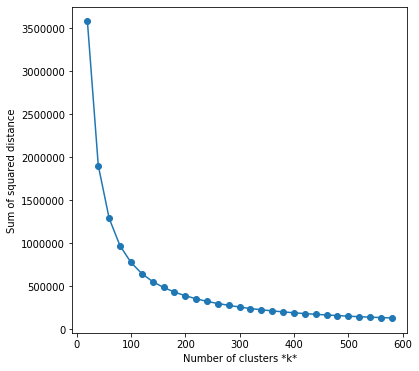

In [4]:
df_cluster = df[['danceability','energy','speechiness','instrumentalness',
    'liveness','valence','tempo','chorus_hit']]
'''
Run the Kmeans algorithm and get the index of data points clusters.
Elbow method gives us an idea on what a good k number of clusters would be based on 
the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. 
'''
sse = []
list_k = list(range(20, 600,20))

for k in list_k:
    km = KMeans( n_clusters=k, init='k-means++',n_init=10, max_iter=300, 
    tol=1e-04, random_state=0,n_jobs=-1)
    km.fit(df_cluster)
    sse.append(km.inertia_)
    print(k)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

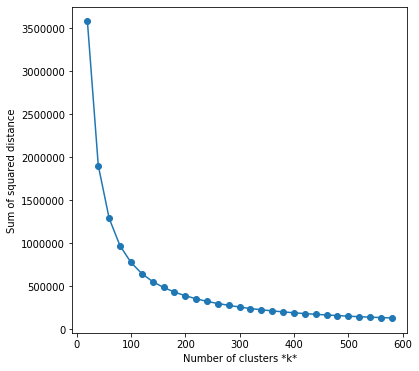

In [12]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.savefig('ssd.png')

In [13]:
clusters = km.fit_predict(df_cluster)

In [14]:
clusters.size

41106

In [15]:
df.shape

(41106, 18)

In [16]:
df['cluster_num'] = clusters

In [17]:
dropCol = ["key","loudness","mode","acousticness",'duration_ms','time_signature','sections']

df = df.drop(dropCol,axis=1)

In [18]:
df.head()

,track,artist,uri,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,chorus_hit,cluster_num
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,0.0289,0.00000,0.159,0.532,133.061,30.88059,66
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,0.1830,0.00000,0.148,0.688,92.988,41.51106,522
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,0.0473,0.00457,0.174,0.300,86.964,65.32887,567
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,0.1660,0.07840,0.192,0.333,148.440,58.59528,456
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,0.0275,0.00000,0.125,0.631,112.098,22.62384,237


In [19]:
df.to_csv('clustered_data.csv',index=False)